In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import resample
import time
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from hierarchical_clustering import hierarchical_clustering, plot_dendrogram, find_optimal_clusters, get_clusters_by_cut, compute_distances, linkage_matrix_to_labels
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
path_citrus = 'dataset/citrus.csv'
citrus = pd.read_csv(path_citrus)

path_iris = 'dataset\Iris.csv'
iris = pd.read_csv(path_iris)

In [3]:
scaler = MinMaxScaler()
le = LabelEncoder()

n_samples = 3000
colors = ['red', 'green', 'blue']
numerical = ['diameter', 'weight']
target_citrus = 'name'

citrus_processed = resample(
    citrus,
    replace=False,  # Без замены
    n_samples=n_samples,  # Количество выборки
    stratify=citrus[target_citrus],  # Указываем метки
    random_state=42  # Для воспроизводимости
)

names = pd.unique(citrus[target_citrus])

citrus_processed[colors] /= 255
citrus_processed[numerical] = scaler.fit_transform(citrus_processed[numerical])
citrus_processed[target_citrus] = le.fit_transform(citrus_processed[target_citrus])

print(names)
citrus_processed.head()

['orange' 'grapefruit']


,name,diameter,weight,red,green,blue
1064,1,0.335804,0.293562,0.556863,0.360784,0.090196
8,1,0.127502,0.076910,0.623529,0.352941,0.062745
1670,1,0.369904,0.331788,0.678431,0.321569,0.007843
1569,1,0.363973,0.325837,0.560784,0.352941,0.066667
6872,0,0.601186,0.597654,0.588235,0.282353,0.105882


In [4]:
iris_processed = iris.copy()
categorical = ['Species']
numerical = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target_iris = 'Species'
for feature in categorical:
    iris_processed[feature] = le.fit_transform(iris_processed[feature])

iris_processed[numerical] = scaler.fit_transform(iris_processed[numerical])
iris_processed.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.041667,0
1,2,0.166667,0.416667,0.067797,0.041667,0
2,3,0.111111,0.500000,0.050847,0.041667,0
3,4,0.083333,0.458333,0.084746,0.041667,0
4,5,0.194444,0.666667,0.067797,0.041667,0


In [5]:
X_citrus = citrus_processed.drop(columns=target_citrus).to_numpy()
y_citrus = citrus_processed[target_citrus]

X_iris = iris_processed.drop(columns=[target_iris,'Id']).to_numpy()
y_iris = iris_processed[target_iris]

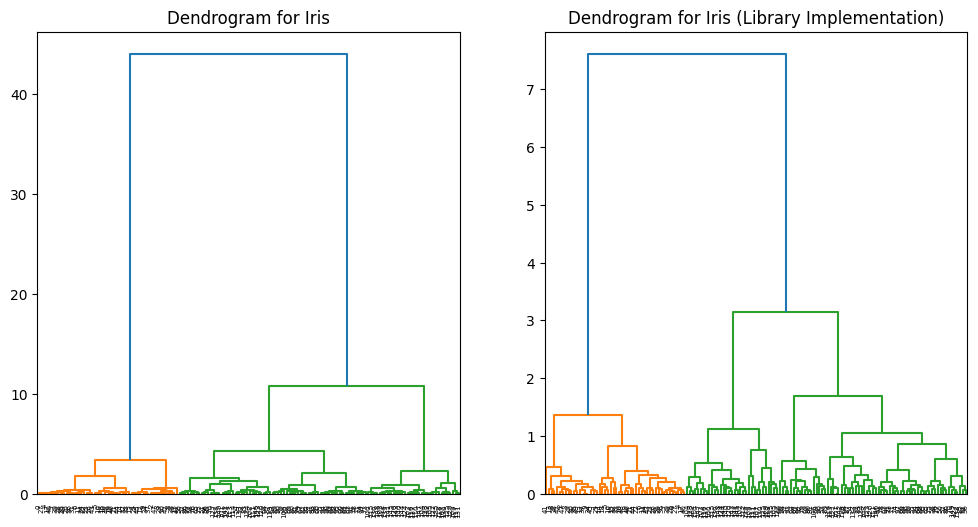

Iris -> optimal clusters: 2 silhouette: 0.629
Iris -> Custom Execution Time: 0.0184 sec
Iris -> Library Execution Time: 0.001 sec
Custom Implementation -> Intra-cluster: 0.3183, Inter-cluster: 0.9787
Library Implementation -> Intra-cluster: 0.3183, Inter-cluster: 0.9787


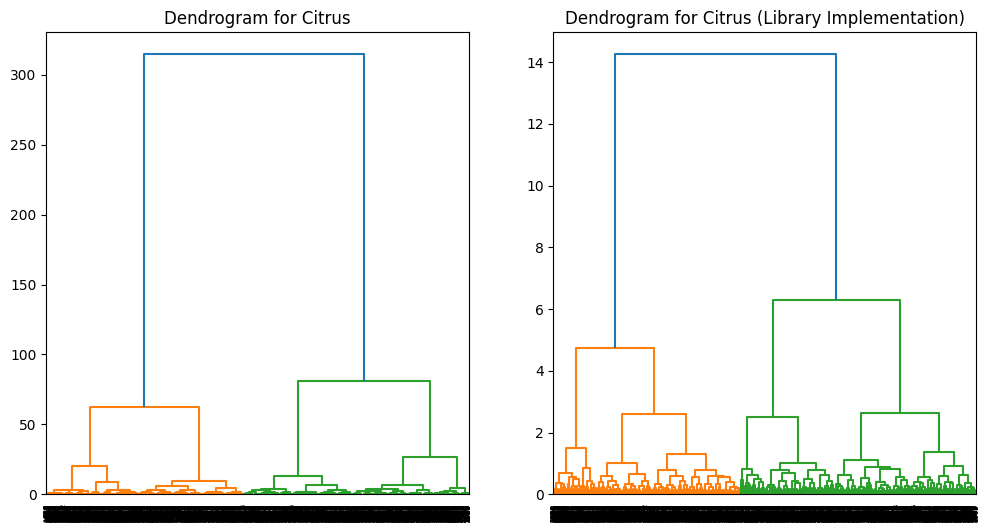

Citrus -> optimal clusters: 2 silhouette: 0.508
Citrus -> Custom Execution Time: 47.9518 sec
Citrus -> Library Execution Time: 0.0942 sec
Custom Implementation -> Intra-cluster: 0.1755, Inter-cluster: 0.3863
Library Implementation -> Intra-cluster: 0.1761, Inter-cluster: 0.3857


In [6]:
for data, title in [(X_iris, "Iris"), (X_citrus, "Citrus")]:
    start_time = time.time()
    merge_matrix, _ = hierarchical_clustering(data, k=1, method="ward")
    custom_time = time.time() - start_time
    
    start_time = time.time()
    linkage_matrix = linkage(data, method="ward")
    library_time = time.time() - start_time

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title(f"Dendrogram for {title}")
    plot_dendrogram(merge_matrix)

    plt.subplot(1, 2, 2)
    plt.title(f"Dendrogram for {title} (Library Implementation)")
    dendrogram(linkage_matrix)
    plt.show()

    k, sc = find_optimal_clusters(data, merge_matrix)
    labs = get_clusters_by_cut(merge_matrix, data.shape[0], k)
    intra_custom, inter_custom = compute_distances(data, labs)

    library_labels = linkage_matrix_to_labels(linkage_matrix, len(data), k)
    intra_library, inter_library = compute_distances(data, library_labels)
    
    print(title, "-> optimal clusters:", k, "silhouette:", round(sc, 3))
    print(f"{title} -> Custom Execution Time: {round(custom_time, 4)} sec")
    print(f"{title} -> Library Execution Time: {round(library_time, 4)} sec")
    print(f"Custom Implementation -> Intra-cluster: {round(intra_custom, 4)}, Inter-cluster: {round(inter_custom, 4)}")
    print(f"Library Implementation -> Intra-cluster: {round(intra_library, 4)}, Inter-cluster: {round(inter_library, 4)}")